In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [79]:
raw_data=pd.read_csv("F:\\2.01. Admittance.csv")
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [80]:
data=raw_data.copy()
data['Admitted']=data['Admitted'].map({'Yes':1,'No':0})
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [81]:
y=data['Admitted']
x1=data['SAT']


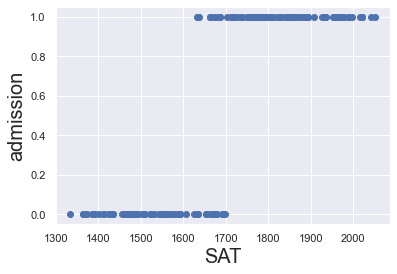

In [82]:
plt.scatter(x1,y)
plt.xlabel('SAT',fontsize=20)
plt.ylabel('admission',fontsize=20)
plt.show()

In [83]:
x=sm.add_constant(x1)
print(x)
reg_lin=sm.OLS(y,x)
result=reg_lin.fit()
result.params


     const   SAT
0      1.0  1363
1      1.0  1792
2      1.0  1954
3      1.0  1653
4      1.0  1593
..     ...   ...
163    1.0  1722
164    1.0  1750
165    1.0  1555
166    1.0  1524
167    1.0  1461

[168 rows x 2 columns]


const   -3.251859
SAT      0.002248
dtype: float64

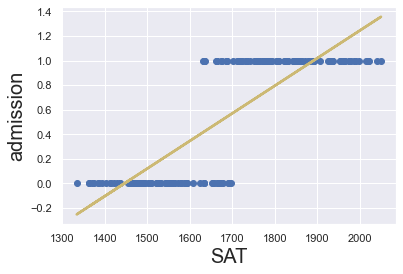

In [84]:
plt.scatter(x1,y,color='C0')
yhat=x1*result.params[1]+result.params[0]
plt.plot(x1,yhat,lw=2.5,color='C8')
plt.xlabel('SAT',fontsize=20)
plt.ylabel('admission',fontsize=20)
plt.show()

# plot with logistic reg

In [85]:
reg_log=sm.Logit(y,x)
result_log=reg_log.fit()
result_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                  0.7992
Time:                        16:31:03   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

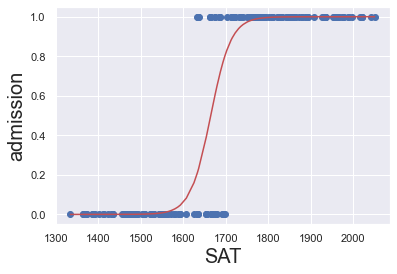

(168,)

In [86]:
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/(1+np.exp(b0+x*b1)))

f_sorted=np.sort(f(x1,result_log.params[0],result_log.params[1]))
x_sorted=np.sort(np.array(x1))

plt.scatter(x1,y,color='C0')

plt.xlabel('SAT',fontsize=20)
plt.ylabel('admission',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C3')
plt.show()
f_sorted.shape


In [87]:
result_log.pred_table()

array([[67.,  7.],
       [ 7., 87.]])

In [88]:
cm_df=pd.DataFrame(result_log.pred_table(),columns=['predict 0','predict 1'])
cm_df=cm_df.rename(index={0:'actual 0',1:'actual 1'})
cm_df

,predict 0,predict 1
actual 0,67.0,7.0
actual 1,7.0,87.0


In [89]:
cm=np.array(cm_df)
accuracy=(cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.9166666666666666

# if gender also consider in regression


In [90]:
raw_data1=pd.read_csv('F:\\2.02. Binary predictors.csv')
raw_data1

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male
...,...,...,...
163,1722,Yes,Female
164,1750,Yes,Male
165,1555,No,Male
166,1524,No,Male


In [91]:
data1=raw_data1.copy()
data1['Admitted']=data1['Admitted'].map({'No':0,'Yes':1})
data1['Gender']=data1['Gender'].map({'Male':0,'Female':1})
data1

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1
3,1653,0,0
4,1593,0,0
...,...,...,...
163,1722,1,1
164,1750,1,0
165,1555,0,0
166,1524,0,0


In [100]:
y=data1['Admitted']
x1=data1[['SAT','Gender']]
x1

,SAT,Gender
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,0
165,1555,0
166,1524,0


In [93]:
x=sm.add_constant(x1)

reg_log=sm.Logit(y,x)
result=reg_log.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                  0.8249
Time:                        16:31:16   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [101]:
cm=np.array(result.pred_table())

In [102]:
accuracy=(cm[0,0]+cm[1,1])/cm.sum()
accuracy

0.9464285714285714

In [113]:
result.params

const    -68.348857
SAT        0.040602
Gender     1.944890
dtype: float64

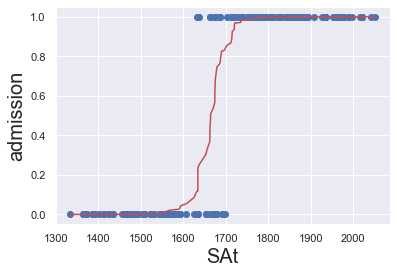

In [127]:

def f(x,b0,b1,b2):
    return np.array(np.exp(b0+x['SAT']*b1+x['Gender']*b2)/(1+np.exp(b0+x['SAT']*b1+x['Gender']*b2)))

f_sorted=np.sort(f(x1,result.params[0],result.params[1],result.params[2]))
x_sorted=np.sort(np.array(x1['SAT']))

plt.scatter(x1['SAT'],y,color='C0')

plt.xlabel('SAt',fontsize=20)
plt.ylabel('admission',fontsize=20)
plt.plot(x_sorted,f_sorted,color='C3')
plt.show()



In [128]:

f_sorted

array([6.90365056e-07, 2.24098643e-06, 2.33384671e-06, 2.97763113e-06,
       3.50270235e-06, 5.47478329e-06, 5.93790185e-06, 1.09176200e-05,
       1.77714430e-05, 3.40287420e-05, 4.16877326e-05, 4.16877326e-05,
       5.29744519e-05, 9.38962885e-05, 1.14569602e-04, 1.15028367e-04,
       1.19794265e-04, 1.35309631e-04, 1.65760554e-04, 1.71939595e-04,
       1.94984937e-04, 2.11475559e-04, 2.11475559e-04, 2.29360536e-04,
       2.69794875e-04, 3.30501192e-04, 3.44191566e-04, 4.21630759e-04,
       4.57280919e-04, 6.32662368e-04, 8.75249154e-04, 9.45435107e-04,
       1.36735818e-03, 1.54420446e-03, 1.66794418e-03, 2.05076737e-03,
       2.13556422e-03, 3.20169382e-03, 4.24966754e-03, 4.42498320e-03,
       4.42498320e-03, 5.41558024e-03, 5.61635704e-03, 5.61635704e-03,
       5.87100388e-03, 6.89914934e-03, 1.07417839e-02, 1.15939831e-02,
       1.42225547e-02, 1.48031753e-02, 1.95739604e-02, 2.28569785e-02,
       2.29464135e-02, 2.48392751e-02, 2.48392751e-02, 3.01439361e-02,
      